# Basic Data Structure Representing Meshes


## Data structure: node and elem

Two matrices `node(1:N,1:d)` and `elem(1:NT,1:d+1)` are used to represent a d-dimensional triangulation embedded in $\mathbb R^d$, where `N` is the number of vertices and `NT` is the number of elements. 
 
`node(k,1)` and `node(k,2)` are the x- and y-coordinates of the k-th node for points in 2-D. In 3-D, `node(k,3)` gives the additional z-coordinates of the k-th node. 

`elem(t,1:3)` are indices of 3 vertices of triangle `t`. `elem(t,1:4)` are indices of 4 vertices of tetrahedron `t`. By convention, the vertices are ordered such that the signed area/volume is positive. Therefore in 2-D, three vertices of a triangle is ordered counterclockwise and in 3-D, the ordering of four vertices of a tetrahedron follows the right-hand rule.

If the vertices are not positive ordering, call `elem = fixorder(node,elem)` to set all triangles counter-clockwise or `elem = fixorder3(node,elem)` to fix the orientation of tetrahedra. 

For the following cases, a different ordering is used for other consideration.
- Edge and face elements; see [Simplicial Complex in Three Dimensions](sc3doc.html)
- [Uniform refinement in 3-D](uniformrefine3doc.html) 

## Example: L-shape domain in 2-D

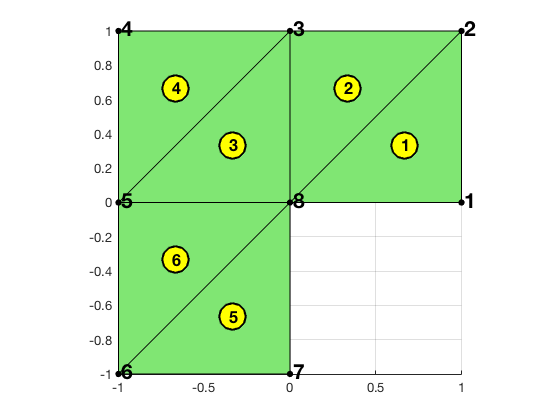

In [1]:
node = [1,0; 1,1; 0,1; -1,1; -1,0; -1,-1; 0,-1; 0,0];  % coordinates
elem = [1,2,8; 3,8,2; 8,3,5; 4,5,3; 7,8,6; 5,6,8];     % connectivity
showmesh(node,elem); 
axis on;
findelem(node,elem);  % plot indices of all triangles
findnode(node);       % plot indices of all vertices

Apply the uniform refinement sevreal times to obtain a fine mesh.

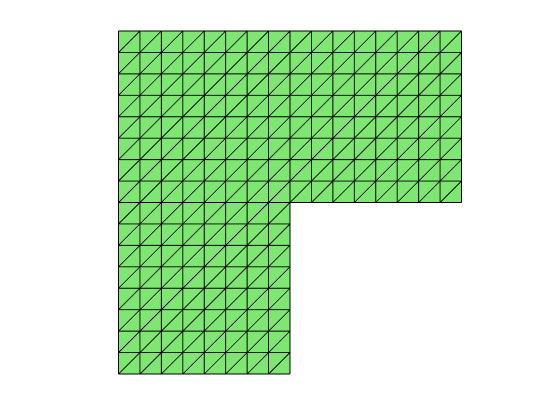

In [2]:
for i = 1:3
    [node,elem] = uniformrefine(node,elem);
end
showmesh(node,elem);

## Example: A Cube in 3-D

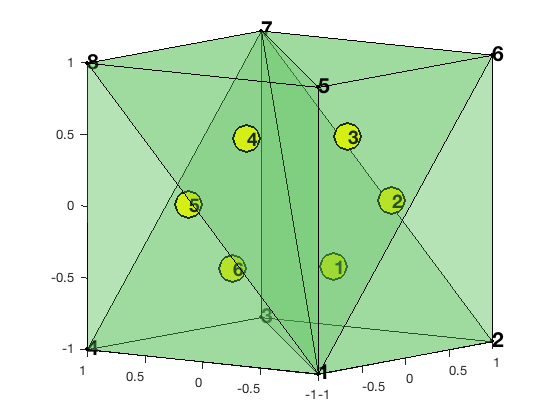

In [3]:
node = [-1,-1,-1; 1,-1,-1; 1,1,-1; -1,1,-1; -1,-1,1; 1,-1,1; 1,1,1; -1,1,1]; 
elem = [1,2,3,7; 1,6,2,7; 1,5,6,7; 1,8,5,7; 1,4,8,7; 1,3,4,7];
clf; showmesh3(node,elem,[],'FaceAlpha',0.25);
view([-53,8]);
axis on
findelem3(node,elem);
findnode3(node);

Unlike 2-D case, to apply uniform refinement to obtain a fine mesh with good mesh quality, a different ordering of the inital mesh, which may violate the positive ordering, should be used. See [3 D Red Refinement](uniformrefine3doc.html).